### 1. Inspect Words with Character Count between 10 and 20:
We do this because the frequencies in this range look weird.

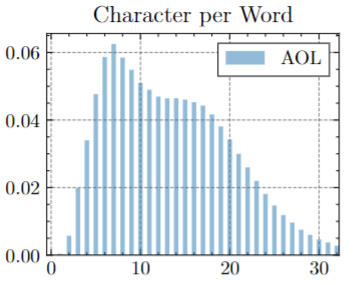

In [1]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# select dataset (if none is selected all datasets are visualized in a joint plot) 
# dataset: DatasetName = None 
dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
# analyses.append('word-count-frequencies-named-entities')
# analyses.append('character-count-frequencies-words')
analyses.append('get-lengths-words')


# analyses.append('extract-named-entities')
# analyses.append('extract-words')
# analyses.append('extract-chars')


Load data:

In [13]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time

# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary

        paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
            "aol", "aql", "ms-marco", "orcas"]}
        # iterate over datasets and create visualization
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")
        label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name)
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

Loading data from aol dataset
aol loaded in 2.317593574523926 min


Inspect:

In [ ]:

data = analysis_data[0][dataset]
for length in [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    print(f"Length: {length}")
    data_queried = data.query('`character-count` == @length')
    print(data_queried.sort_values(by='count()', ascending=False).head(10))

Length: 4
      word  count()  character-count
1581  free   450322                4
387   http   263056                4
3356  ebay   161152                4
820   sale   145696                4
0     city   145039                4
2332  with   144546                4
1931  home   141998                4
1638  what   127657                4
0     .com   121812                4
4461  york   116036                4
Length: 5
       word  count()  character-count
4295  yahoo   219822                5
4198  state   137784                5
2215  games   120802                5
3229  texas   118799                5
5153  music   118327                5
895   black   109339                5
1957  beach   108791                5
0     girls    99379                5
2361  women    92796                5
1975  homes    85547                5
Length: 6
        word  count()  character-count
1915  google   366059                6
2077  county   232176                6
4060  lyrics   190043       

As we can see, between words of length 10 until length 20, a lot of website addresses are frequent. Let's see if the distribtion ist still skewed after we remove internet domains from the word collection. Therefore, we create a dataset that is filtered by website addresses:

In [ ]:
data[~data["word"].str.contains(pat="http|www.|.com|.net|.org|.int|.edu", na=False)].to_parquet("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-filter-urls-words-all/results.parquet")



### 2. Remove outliers from AQL 
We can observe, that querys with a certain length in character count are absurdly frequent. Namely, queries with a character count of 14, 16 and 24. Let's inspect the most frequent queries of this length.

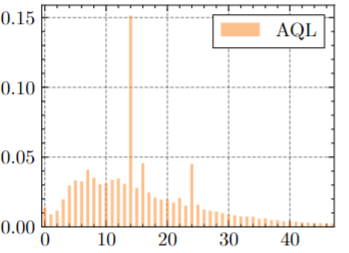

In [1]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# select dataset (if none is selected all datasets are visualized in a joint plot) 
# dataset: DatasetName = None 
dataset: DatasetName = 'aql'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
# analyses.append('get-lengths-queries')
# analyses.append('character-count-frequencies-queries')
analyses.append('aql-anomaly')


Load data:

In [2]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time
import pyarrow.compute as pc
# load data
analysis_data = []
for analysis_name in analyses:
    # load data from single dataset
    result_paths = _get_results_paths(dataset, analysis_name)
    start_time = time.time()
    print(f"Loading data from {dataset} dataset")
    # filter_cols = (pc.field('character-count') == 14) | (pc.field('character-count') == 16) | (pc.field('character-count') == 24) 
    # result_data = {dataset: load_results(result_paths, cols=['serp_query_text_url', 'character-count', 'count()'], filter_cols=filter_cols)}
    result_data = {dataset: load_results(result_paths)}
    end_time = time.time()  
    print(f"{dataset} loaded in {(end_time - start_time)/60} min")
    analysis_data.append(result_data)   

Loading data from aql dataset
aql loaded in 2.1104878187179565 min


In [10]:
most_frequent_queries = []
for length in [14,16,24]:
    print(f"Length: {length}")
    data_queried = analysis_data[0][dataset].query('`character-count` == @length')
    data_queried_sorted = data_queried.sort_values(by='count()', ascending=False).head(20) 
    print(data_queried_sorted)
    most_frequent_queries.append(data_queried_sorted['serp_query_text_url'].head(1).to_list())
# analysis_data[0]['aql'].sort_values(by='count()', ascending=False).head(30).sort_values(by='character-count', ascending=True)
famous_queries = [item for sublist in most_frequent_queries for item in sublist]
print(famous_queries)

Length: 14
      serp_query_text_url  character-count   count()
0          茅聵驴茅聡聦猫聹聵猫聸聸忙卤               14  28210439
0          é¿éèèæ±               14  14277785
0          #communitywebs               14    139392
0          p2045576.m1710               14    124971
0          INDEXBVMF:IBOV               14     70097
0          INDEXTSI:OSPTX               14     69462
13         INDEXIST:XU100               14     60159
3603       all categories               14     42607
0          onthetable2019               14     28020
4267       #etatsunis2012               14     27157
0          #GivingTuesday               14     18707
10936      site:hplct.org               14     14881
1455       women+Sneakers               14     14753
2190       funkarmbanduhr               14     14529
16314      进出口银行山东省分行行长牟毅               14     13915
11646      #EnvoyéSpécial               14     13611
0          #referendumCAT               14     13519
6056       MessagesCenter          